In [ ]:
import os
import random
import shutil
import zipfile
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D



import os

import shutil

In [ ]:
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
 99% 193M/195M [00:01<00:00, 149MB/s]
100% 195M/195M [00:01<00:00, 144MB/s]


In [ ]:
!unzip breast-ultrasound-images-dataset.zip -d dataset_dir

Archive:  breast-ultrasound-images-dataset.zip
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: dataset_dir/Dataset_BUSI_with_GT/benign/benign (10

In [ ]:
zip_path = '/content/breast-ultrasound-images-dataset.zip'
extract_to = '/content/breast-ultrasound-images-dataset'  # Define where to extract the files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [ ]:
# Check the contents of the extracted directory
dataset_dir = extract_to
print(os.listdir(dataset_dir))


['Dataset_BUSI_with_GT']


In [ ]:
dataset_dir = '/content/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'  # Path to the directory containing benign, malignant, and normal folders

Number of Malignant images: 421
Number of Benign images: 891
Number of Normal images: 266


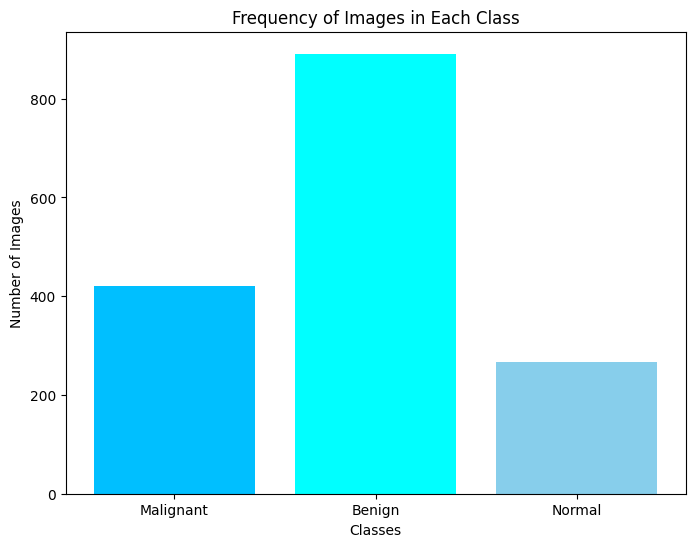

In [ ]:
# Define the paths to the directories
malignant_dir = '/content/dataset_dir/Dataset_BUSI_with_GT/malignant'
benign_dir = '/content/dataset_dir/Dataset_BUSI_with_GT/benign'
normal_dir = '/content/dataset_dir/Dataset_BUSI_with_GT/normal'

# Count the number of files (images) in each directory
num_malignant = len(os.listdir(malignant_dir))
num_benign = len(os.listdir(benign_dir))
num_normal = len(os.listdir(normal_dir))

# Print the results
print(f'Number of Malignant images: {num_malignant}')
print(f'Number of Benign images: {num_benign}')
print(f'Number of Normal images: {num_normal}')

# Prepare data for the bar chart
classes = ['Malignant', 'Benign', 'Normal']
frequencies = [num_malignant, num_benign, num_normal]

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(classes, frequencies, color=['deepskyblue', 'aqua', 'skyblue'])

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Frequency of Images in Each Class')
plt.show()

In [ ]:
# Set paths
malignant_dir = os.path.join(dataset_dir, 'malignant')
benign_dir = os.path.join(dataset_dir, 'benign')
normal_dir = os.path.join(dataset_dir, 'normal')

# Create directories for the split data
base_dir = "/content/split_dataset"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create subdirectories for each class
for category in ['malignant', 'benign', 'normal']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Function to split data
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
    data = []
    for item in os.listdir(SOURCE):
        item_path = os.path.join(SOURCE, item)
        if os.path.getsize(item_path) > 0:
            data.append(item)

    random.shuffle(data)
    train_size = int(SPLIT_SIZE * len(data))
    validation_size = int((len(data) - train_size) / 2)

    train_data = data[:train_size]
    validation_data = data[train_size:train_size + validation_size]
    test_data = data[train_size + validation_size:]

    for item in train_data:
        shutil.copy(os.path.join(SOURCE, item), os.path.join(TRAINING, item))

    for item in validation_data:
        shutil.copy(os.path.join(SOURCE, item), os.path.join(VALIDATION, item))

    for item in test_data:
        shutil.copy(os.path.join(SOURCE, item), os.path.join(TESTING, item))

# Define split size (e.g., 70% train, 15% validation, 15% test)
split_size = 0.7

# Split the data
split_data(malignant_dir, os.path.join(train_dir, 'malignant'), os.path.join(validation_dir, 'malignant'), os.path.join(test_dir, 'malignant'), split_size)
split_data(benign_dir, os.path.join(train_dir, 'benign'), os.path.join(validation_dir, 'benign'), os.path.join(test_dir, 'benign'), split_size)
split_data(normal_dir, os.path.join(train_dir, 'normal'), os.path.join(validation_dir, 'normal'), os.path.join(test_dir, 'normal'), split_size)


In [ ]:
#My Proposed CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and number of classes
img_width, img_height = 224, 224
num_classes = 3  # Benign, Malignant, Normal

# Initializing the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the CNN
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model architecture
model.summary()

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset
train_generator = train_datagen.flow_from_directory('/content/split_dataset/train',
                                                    target_size=(img_width, img_height),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/split_dataset/validation',
                                                        target_size=(img_width, img_height),
                                                        batch_size=32,
                                                        class_mode='categorical')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=25)

# Save the model
#model.save('breast_cancer_classifier.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,600,643 (9.92 MB)

 Trainable params: 2,600,643 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

Found 1103 images belonging to 3 classes.
Found 237 images belonging to 3 classes.
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 486ms/step - accuracy: 0.5257 - loss: 0.9599 - val_accuracy: 0.5625 - val_loss: 0.8666
Epoch 2/25
 1/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5625 - loss: 0.9275

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5625 - loss: 0.9275 - val_accuracy: 0.6923 - val_loss: 0.8127
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 429ms/step - accuracy: 0.6133 - loss: 0.8190 - val_accuracy: 0.6473 - val_loss: 0.7906
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7188 - loss: 0.6418 - val_accuracy: 0.6923 - val_loss: 0.5429
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 424ms/step - accuracy: 0.6681 - loss: 0.7347 - val_accuracy: 0.6116 - val_loss: 0.7863
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6562 - loss: 0.7170 - val_accuracy: 0.7692 - val_loss: 0.5207
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 433ms/step - accuracy: 0.6993 - loss: 0.6748 - val_accuracy: 0.7188 - val_loss: 0.6467
Epoch 8/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.6875 - loss: 0.6325 - val_accuracy: 0.8462 - val_loss: 0.4017
Epoch 9/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 434ms/step - accuracy: 0.7104 - loss: 0.6598 - val_accuracy: 0.7321 - val_l

Found 1103 images belonging to 3 classes.


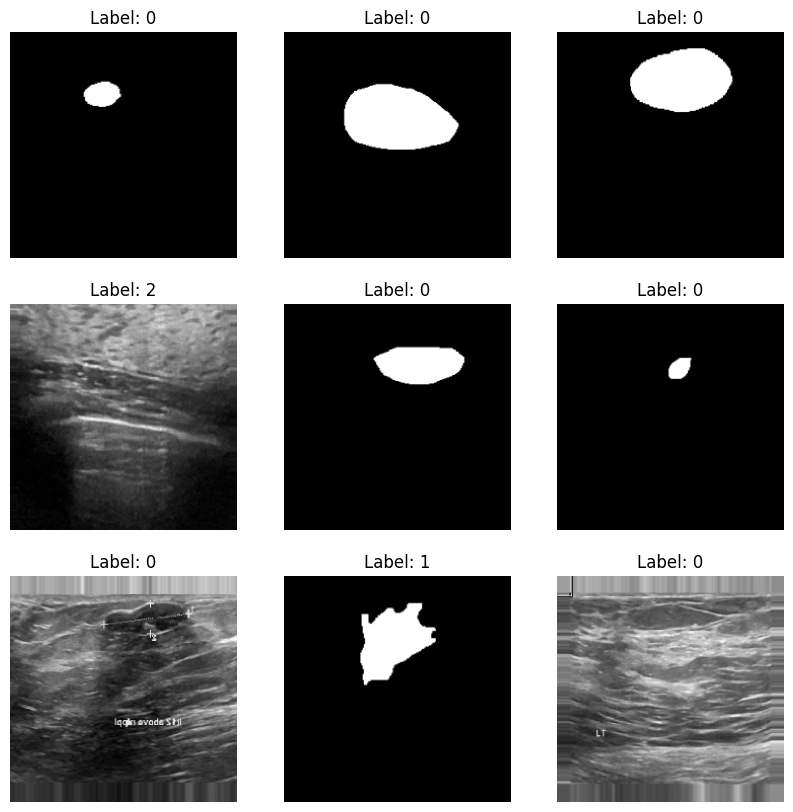

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Set as training data


# Get a batch of images and labels from the training set
train_images, train_labels = next(train_generator)

# Plot the first 9 images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title("Label: " + str(np.argmax(train_labels[i])))
    plt.axis('off')
plt.show()


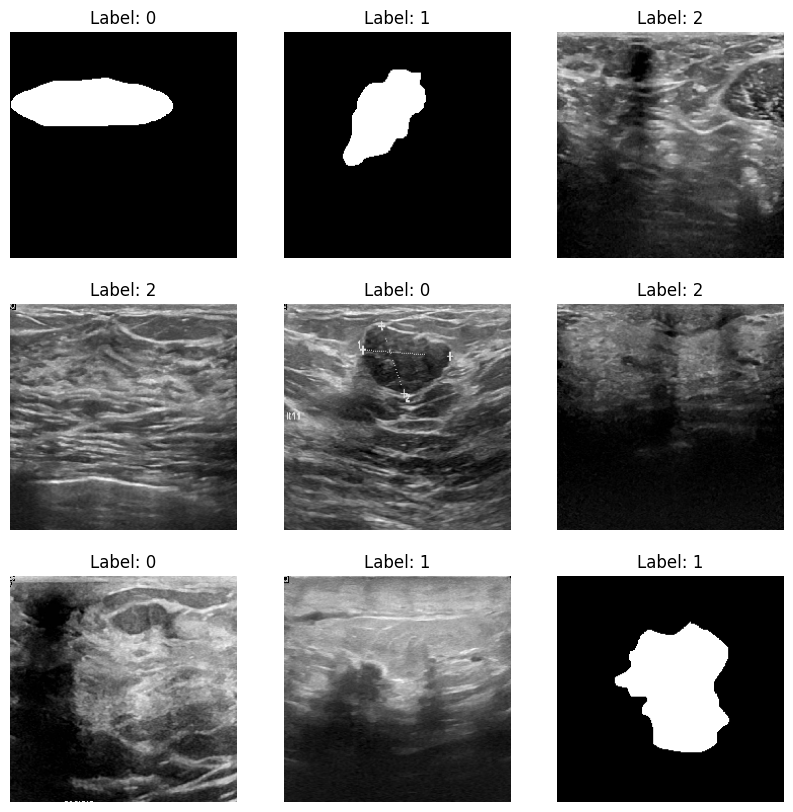

In [ ]:
# Get a batch of images and labels from the validation set
validation_images, validation_labels = next(validation_generator)

# Plot the first 9 images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(validation_images[i])
    plt.title("Label: " + str(np.argmax(validation_labels[i])))
    plt.axis('off')
plt.show()


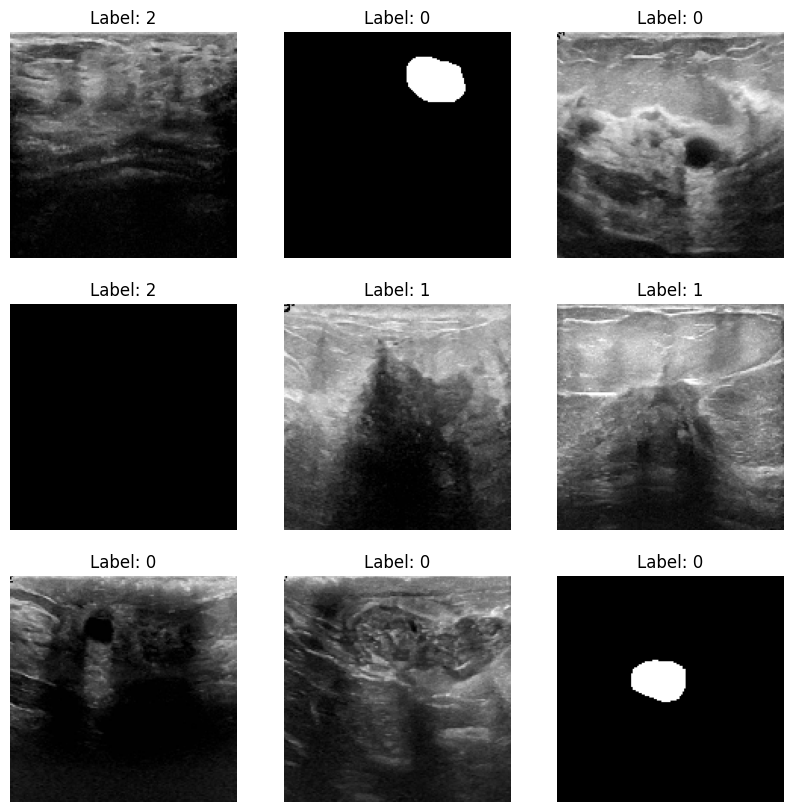

In [ ]:
# Get a batch of images and labels from the test set
test_images, test_labels = next(test_generator)

# Plot the first 9 images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title("Label: " + str(np.argmax(test_labels[i])))
    plt.axis('off')
plt.show()


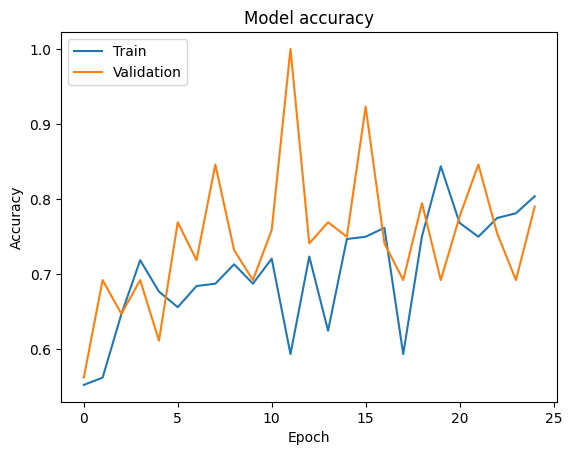

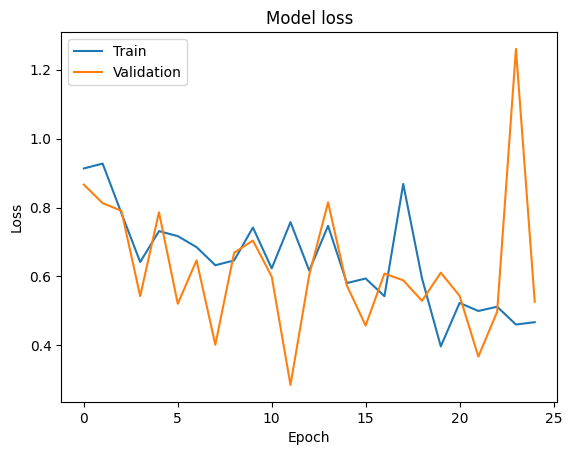

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Found 238 images belonging to 3 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
Test Accuracy: 77.73%


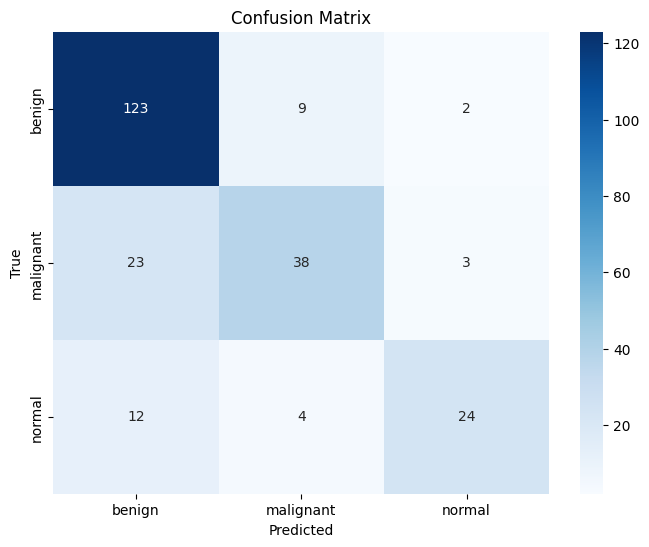

              precision    recall  f1-score   support

      benign       0.78      0.92      0.84       134
   malignant       0.75      0.59      0.66        64
      normal       0.83      0.60      0.70        40

    accuracy                           0.78       238
   macro avg       0.78      0.70      0.73       238
weighted avg       0.78      0.78      0.77       238



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Predict the labels of the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_labels = list(test_generator.class_indices.keys())

# Print Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=cm_labels))


In [ ]:
##LeNet-5 pretrained model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Image size for LeNet-5
img_width, img_height = 32, 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values between 0 and 1
    rotation_range=10,             # Randomly rotate images by up to 10 degrees
    width_shift_range=0.1,         # Randomly shift images horizontally
    height_shift_range=0.1,        # Randomly shift images vertically
    shear_range=0.1,               # Shear transformation
    zoom_range=0.1,                # Zoom in/out by 10%
    horizontal_flip=True,          # Randomly flip images horizontally
    validation_split=0.2)          # Split data into training and validation sets

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Train set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Training data

# Validation set
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Validation data

# Test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 884 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Defining LeNet-5 model
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_width, img_height, 1)),
    AveragePooling2D(pool_size=(2, 2)),  # Add pool_size argument
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),  # Add pool_size argument
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: malignant, benign, normal
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 420ms/step - accuracy: 0.4907 - loss: 1.0227 - val_accuracy: 0.5662 - val_loss: 0.9339
Epoch 2/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.5774 - loss: 0.8819 - val_accuracy: 0.6210 - val_loss: 0.8466
Epoch 3/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.5976 - loss: 0.8283 - val_accuracy: 0.5708 - val_loss: 0.8372
Epoch 4/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.5965 - loss: 0.7699 - val_accuracy: 0.7123 - val_loss: 0.7399
Epoch 5/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.6811 - loss: 0.7612 - val_accuracy: 0.6712 - val_loss: 0.7465
Epoch 6/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - accuracy: 0.6854 - loss: 0.7318 - val_accuracy: 0.7169 - val_loss: 0.6890
Epoch 7/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.6758 - loss: 0.7567 - val_accuracy: 0.6895 - val_loss: 0.6982
Epoch 8/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.6727 - loss: 0.7011 - val_accuracy: 0.6804 - v

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step
Test Accuracy: 67.23%


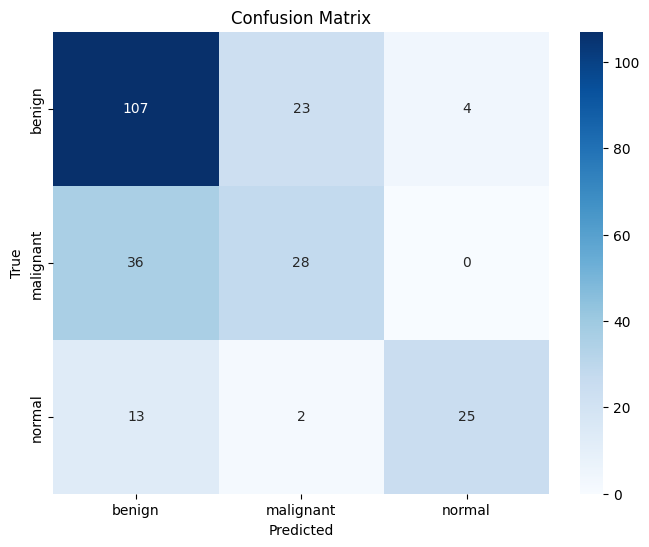

              precision    recall  f1-score   support

      benign       0.69      0.80      0.74       134
   malignant       0.53      0.44      0.48        64
      normal       0.86      0.62      0.72        40

    accuracy                           0.67       238
   macro avg       0.69      0.62      0.65       238
weighted avg       0.67      0.67      0.67       238



In [ ]:
# Predict the labels of the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_labels = list(test_generator.class_indices.keys())

# Print Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=cm_labels))


In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
#Alex Net Pre-trained model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size for AlexNet
img_width, img_height = 227, 227

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values between 0 and 1
    rotation_range=20,             # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,         # Randomly shift images horizontally
    height_shift_range=0.2,        # Randomly shift images vertically
    shear_range=0.2,               # Shear transformation
    zoom_range=0.2,                # Zoom in/out by 20%
    horizontal_flip=True,          # Randomly flip images horizontally
    validation_split=0.2)          # Split data into training and validation sets

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Train set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Training data

# Validation set
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Validation data

# Test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 884 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define AlexNet model
model = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: malignant, benign, normal
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 37s 878ms/step - accuracy: 0.4030 - loss: 2.3537 - val_accuracy: 0.5662 - val_loss: 0.9676
Epoch 2/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 579ms/step - accuracy: 0.5643 - loss: 0.9148 - val_accuracy: 0.5845 - val_loss: 0.7960
Epoch 3/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 508ms/step - accuracy: 0.5860 - loss: 0.8604 - val_accuracy: 0.5845 - val_loss: 0.7576
Epoch 4/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 511ms/step - accuracy: 0.5720 - loss: 0.8634 - val_accuracy: 0.6758 - val_loss: 0.8143
Epoch 5/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 523ms/step - accuracy: 0.6484 - loss: 0.8318 - val_accuracy: 0.6530 - val_loss: 0.7070
Epoch 6/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 576ms/step - accuracy: 0.6440 - loss: 0.7613 - val_accuracy: 0.6804 - val_loss: 0.7375
Epoch 7/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 512ms/step - accuracy: 0.6241 - loss: 0.7701 - val_accuracy: 0.6804 - val_loss: 0.7623
Epoch 8/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 512ms/step - accuracy: 0.5951 - loss: 0.8370 - val_accuracy: 0.703

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step
Test Accuracy: 76.89%


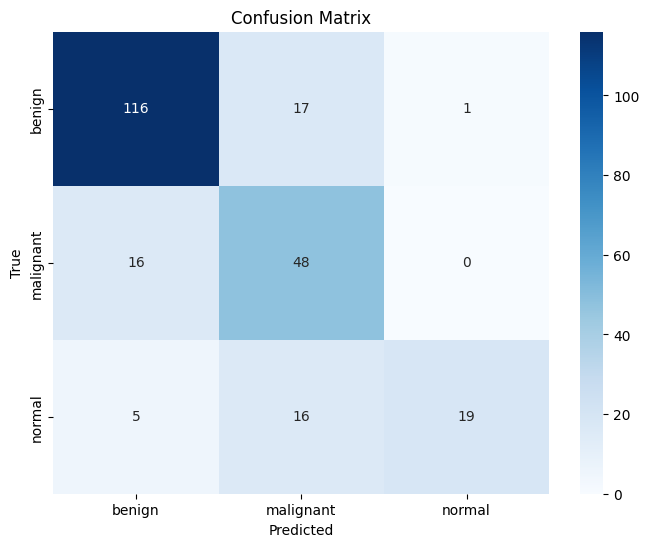

              precision    recall  f1-score   support

      benign       0.85      0.87      0.86       134
   malignant       0.59      0.75      0.66        64
      normal       0.95      0.47      0.63        40

    accuracy                           0.77       238
   macro avg       0.80      0.70      0.72       238
weighted avg       0.80      0.77      0.77       238



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the labels of the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_labels = list(test_generator.class_indices.keys())

# Print Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=cm_labels))


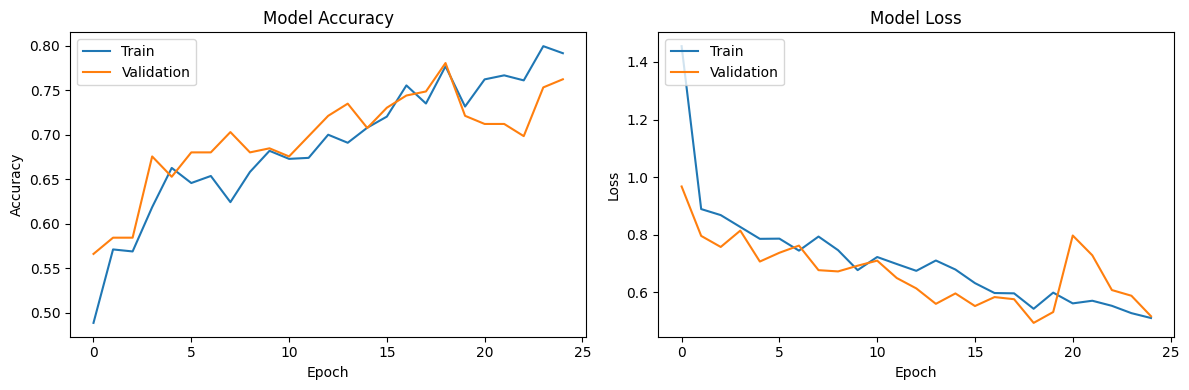

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
###VGG16 pre-trained model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Image size for VGG16
img_width, img_height = 224, 224

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # VGG16 specific preprocessing
    rotation_range=20,              # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,          # Randomly shift images horizontally
    height_shift_range=0.2,         # Randomly shift images vertically
    shear_range=0.2,                # Shear transformation
    zoom_range=0.2,                 # Zoom in/out by 20%
    horizontal_flip=True,           # Randomly flip images horizontally
    validation_split=0.2)           # Split data into training and validation sets

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  # Only rescaling for test data

# Train set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Training data

# Validation set
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Validation data

# Test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 884 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: malignant, benign, normal
])

# Freeze the layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5946 - loss: 9.9572 - val_accuracy: 0.7991 - val_loss: 4.1483
Epoch 2/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 47s 557ms/step - accuracy: 0.7513 - loss: 4.1620 - val_accuracy: 0.7763 - val_loss: 1.1176
Epoch 3/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 532ms/step - accuracy: 0.7108 - loss: 1.6519 - val_accuracy: 0.7534 - val_loss: 0.7313
Epoch 4/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 559ms/step - accuracy: 0.7613 - loss: 0.6382 - val_accuracy: 0.7717 - val_loss: 0.7363
Epoch 5/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 530ms/step - accuracy: 0.8037 - loss: 0.6304 - val_accuracy: 0.7900 - val_loss: 0.5463
Epoch 6/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 524ms/step - accuracy: 0.7860 - loss: 0.6160 - val_accuracy: 0.7945 - val_loss: 0.5855
Epoch 7/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 529ms/step - accuracy: 0.7733 - loss: 0.5528 - val_accuracy: 0.7808 - val_loss: 0.5172
Epoch 8/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 534ms/step - accuracy: 0.7787 - loss: 0.5830 - val_accuracy: 0.7900 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
Test Accuracy: 81.51%


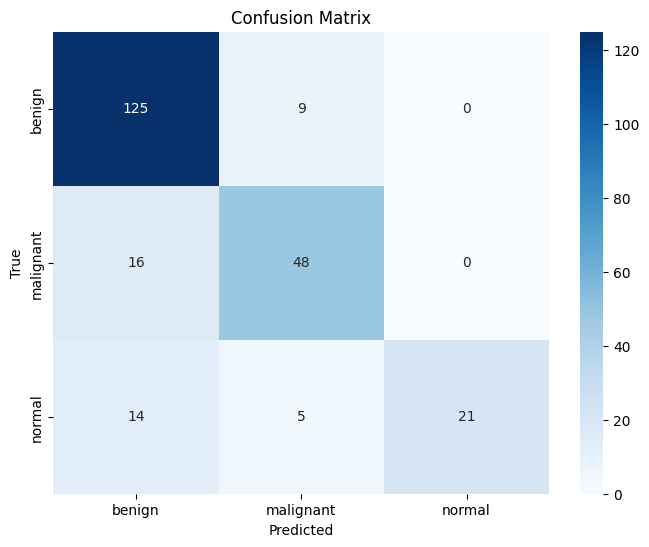

              precision    recall  f1-score   support

      benign       0.81      0.93      0.87       134
   malignant       0.77      0.75      0.76        64
      normal       1.00      0.53      0.69        40

    accuracy                           0.82       238
   macro avg       0.86      0.74      0.77       238
weighted avg       0.83      0.82      0.81       238



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the labels of the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_labels = list(test_generator.class_indices.keys())

# Print Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=cm_labels))


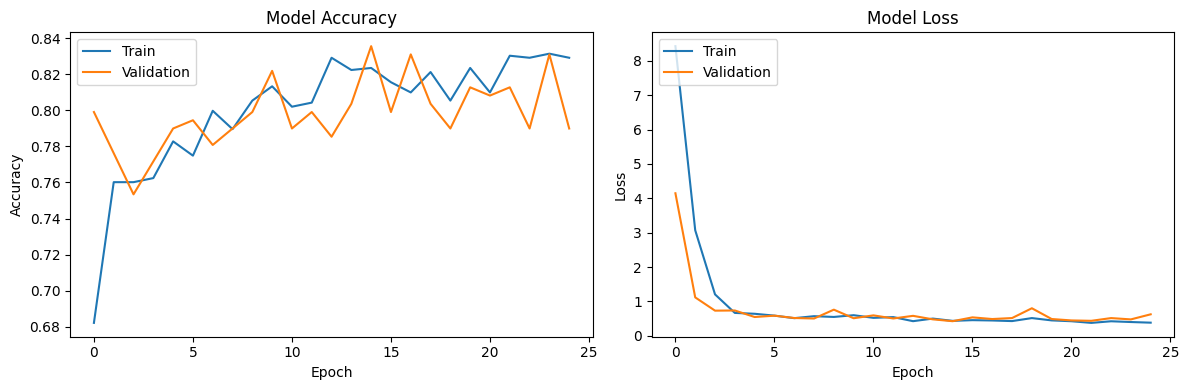

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
###ResNet50

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Image size for ResNet50
img_width, img_height = 224, 224

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 specific preprocessing
    rotation_range=20,              # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,          # Randomly shift images horizontally
    height_shift_range=0.2,         # Randomly shift images vertically
    shear_range=0.2,                # Shear transformation
    zoom_range=0.2,                 # Zoom in/out by 20%
    horizontal_flip=True,           # Randomly flip images horizontally
    validation_split=0.2)           # Split data into training and validation sets

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  # Only rescaling for test data

# Train set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Training data

# Validation set
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Validation data

# Test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 884 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top of ResNet50
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: malignant, benign, normal
])

# Freeze the layers of the ResNet50 base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.5894 - loss: 19.7426 - val_accuracy: 0.7763 - val_loss: 4.4483
Epoch 2/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 516ms/step - accuracy: 0.7656 - loss: 3.2697 - val_accuracy: 0.7991 - val_loss: 0.9752
Epoch 3/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 512ms/step - accuracy: 0.7681 - loss: 0.8984 - val_accuracy: 0.7763 - val_loss: 1.0512
Epoch 4/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 518ms/step - accuracy: 0.7886 - loss: 0.9743 - val_accuracy: 0.7626 - val_loss: 0.9825
Epoch 5/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 526ms/step - accuracy: 0.7788 - loss: 1.4424 - val_accuracy: 0.7900 - val_loss: 0.5987
Epoch 6/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 509ms/step - accuracy: 0.8021 - loss: 0.7551 - val_accuracy: 0.7991 - val_loss: 0.6768
Epoch 7/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 516ms/step - accuracy: 0.8033 - loss: 0.8804 - val_accuracy: 0.7900 - val_loss: 0.6057
Epoch 8/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 508ms/step - accuracy: 0.7864 - loss: 0.7701 - val_accuracy: 0.8037 

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 863ms/step
Test Accuracy: 83.61%


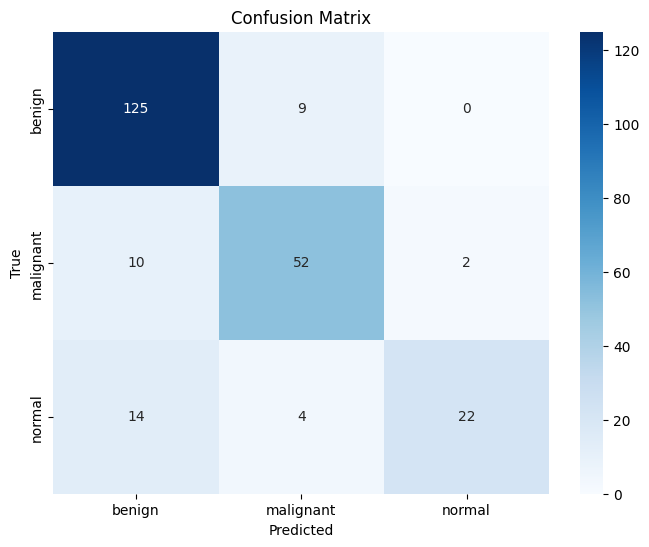

              precision    recall  f1-score   support

      benign       0.84      0.93      0.88       134
   malignant       0.80      0.81      0.81        64
      normal       0.92      0.55      0.69        40

    accuracy                           0.84       238
   macro avg       0.85      0.77      0.79       238
weighted avg       0.84      0.84      0.83       238



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the labels of the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_labels = list(test_generator.class_indices.keys())

# Print Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=cm_labels))


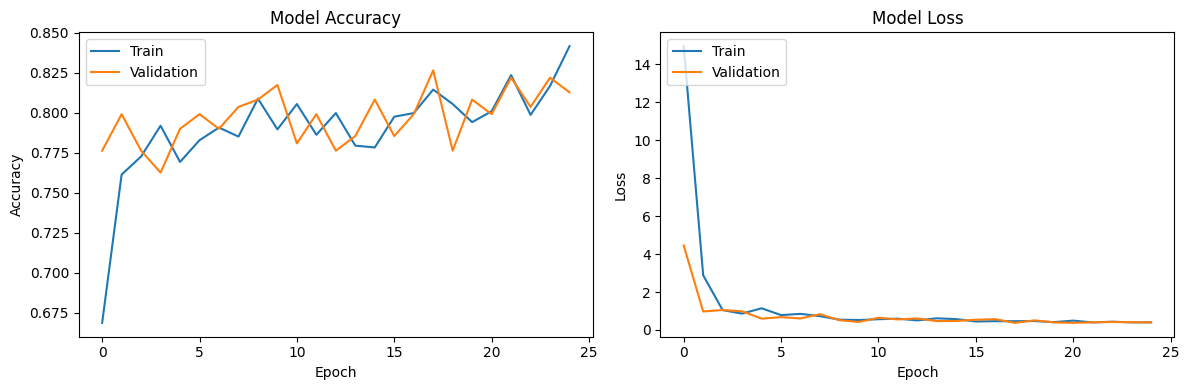

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
##GoogLeNet Pre-trained model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Image size for GoogLeNet (InceptionV3)
img_width, img_height = 299, 299

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # GoogLeNet specific preprocessing
    rotation_range=20,              # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,          # Randomly shift images horizontally
    height_shift_range=0.2,         # Randomly shift images vertically
    shear_range=0.2,                # Shear transformation
    zoom_range=0.2,                 # Zoom in/out by 20%
    horizontal_flip=True,           # Randomly flip images horizontally
    validation_split=0.2)           # Split data into training and validation sets

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  # Only rescaling for test data

# Train set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Training data

# Validation set
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Validation data

# Test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 884 images belonging to 3 classes.
Found 219 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load pre-trained GoogLeNet (InceptionV3) model + higher level layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top of GoogLeNet (InceptionV3)
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: malignant, benign, normal
])

# Freeze the layers of the GoogLeNet base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.5757 - loss: 29.0477 - val_accuracy: 0.7397 - val_loss: 3.1051
Epoch 2/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 828ms/step - accuracy: 0.7110 - loss: 1.8599 - val_accuracy: 0.7352 - val_loss: 0.6970
Epoch 3/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 838ms/step - accuracy: 0.7521 - loss: 0.7019 - val_accuracy: 0.7397 - val_loss: 0.5820
Epoch 4/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 40s 763ms/step - accuracy: 0.7376 - loss: 0.7761 - val_accuracy: 0.7580 - val_loss: 0.5225
Epoch 5/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 33s 988ms/step - accuracy: 0.7542 - loss: 0.5535 - val_accuracy: 0.7717 - val_loss: 0.5084
Epoch 6/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 35s 835ms/step - accuracy: 0.7503 - loss: 0.5776 - val_accuracy: 0.7534 - val_loss: 0.5475
Epoch 7/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 41s 860ms/step - accuracy: 0.7640 - loss: 0.5269 - val_accuracy: 0.7580 - val_loss: 0.5340
Epoch 8/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 778ms/step - accuracy: 0.7593 - loss: 0.5944 - val_accuracy: 0.7443 

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step
Test Accuracy: 75.63%


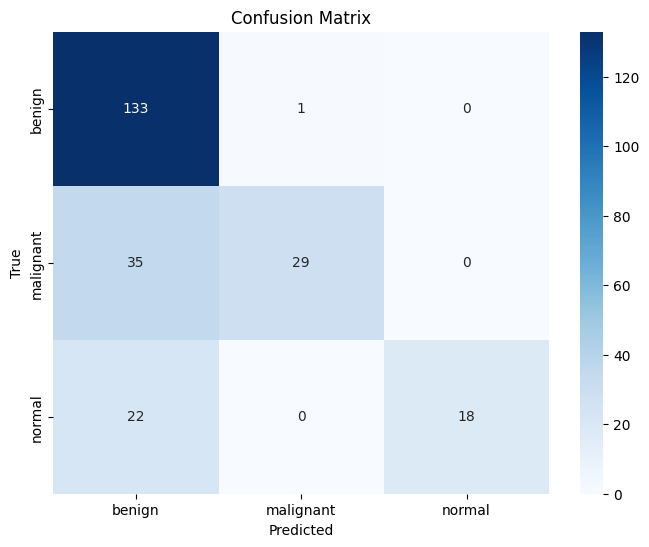

              precision    recall  f1-score   support

      benign       0.70      0.99      0.82       134
   malignant       0.97      0.45      0.62        64
      normal       1.00      0.45      0.62        40

    accuracy                           0.76       238
   macro avg       0.89      0.63      0.69       238
weighted avg       0.82      0.76      0.73       238



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict the labels of the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_labels = list(test_generator.class_indices.keys())

# Print Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=cm_labels))


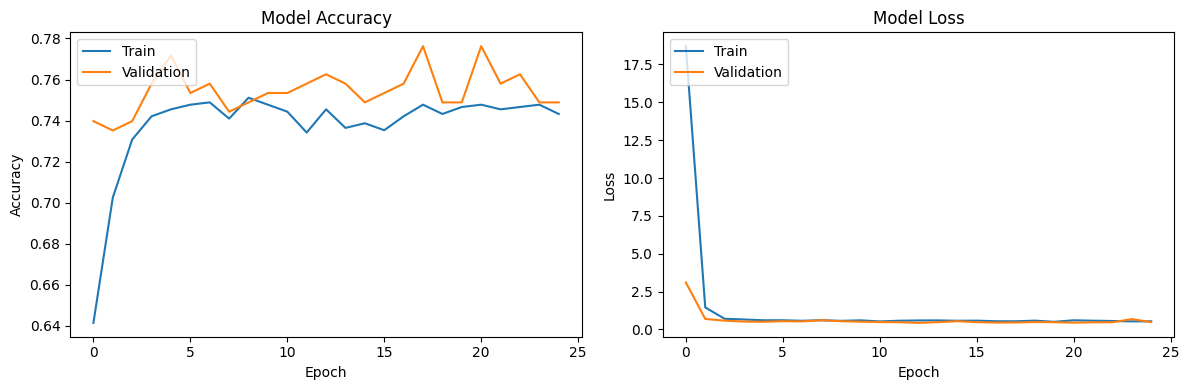

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
